#**Assignment-1**
* You are required to implement two convolutional neural network models:
  1. `SimCNN` (a simple CNN) model built from scratch, and
  2. `ResNet50`, a deep learning CNN that is a pretrained model available in
  Keras.

* Use TensorFlow + Keras to perform classification on the data discussed below. Feel free to use PyTorch if you prefer.

In [1]:
import tensorflow as tf
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **Load Dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f"X Train: {X_train.shape}")
print(f"y Train: {y_train.shape}")
print(f"X Test:  {X_test.shape}")
print(f"y Test:  {X_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
X Train: (50000, 32, 32, 3)
y Train: (50000, 1)
X Test:  (10000, 32, 32, 3)
y Test:  (10000, 32, 32, 3)


## **Explore Data**

In [3]:
import math
import random
import matplotlib.pyplot as plt

def plot_random_images_from_cifar10(images, n, figsize=(4, 4), title=None):
  # Limit the number of images to the smaller of n or the total number of images
  n = min(n, len(images))

  # Randomly sample n images
  rand_indices = random.sample(range(len(images)), n)
  rand_imgs = images[rand_indices]

  # Calculate number of rows and columns
  cols = math.ceil(math.sqrt(n))
  rows = math.ceil(n / cols)

  # Plot images
  plt.figure(figsize=figsize)
  for i, img_idx in enumerate(rand_indices):
    img = images[img_idx]
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')

  # Add a title if provided
  if title:
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.92)  # Adjust layout to accommodate title

    plt.show()

**Random Samples**

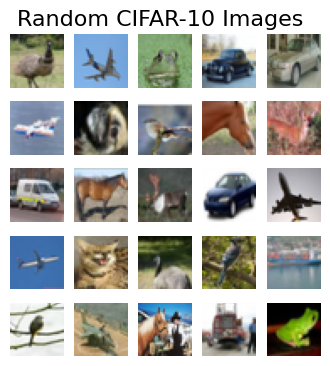

In [4]:
# Example: Display 16 random images from the CIFAR-10 dataset with a custom title
plot_random_images_from_cifar10(X_train, 25, (4,4), title="Random CIFAR-10 Images")

In [5]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

**Class Distribution in Training and Testing Dataset**

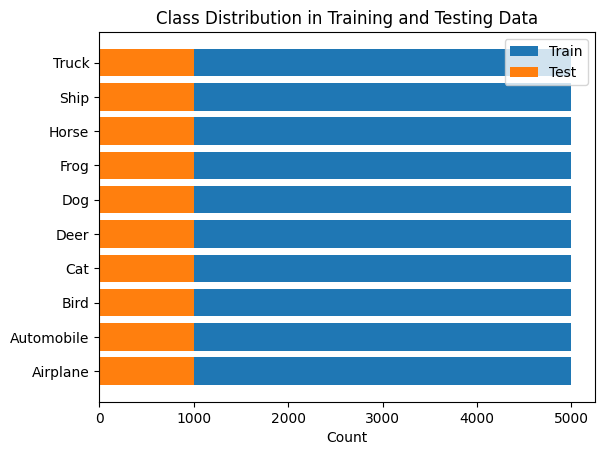

In [6]:
# Class names and unique class counts in training and testing data
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Training set distribution
classes_train, counts_train = np.unique(y_train, return_counts=True)
# Testing set distribution
classes_test, counts_test = np.unique(y_test, return_counts=True)

# Plotting both distributions
plt.barh(class_names, counts_train, label='Train')
plt.barh(class_names, counts_test, label='Test')

# Adding title and legend
plt.title('Class Distribution in Training and Testing Data')
plt.legend()
plt.xlabel('Count')
plt.show()

##**Training**

**SimCNN**

In [7]:
from tensorflow.keras import models, layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [8]:
INPUT_SHAPE = (32, 32, 3)

# Build Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile Model
model.compile(optimizer='sgd',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,210 (481.29 KB)

 Trainable params: 122,890 (480.04 KB)

 Non-trainable params: 320 (1.25 KB)

In [10]:
# Train model
EPOCHS = 20

r = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4022 - loss: 1.7096 - val_accuracy: 0.4673 - val_loss: 1.5528
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5884 - loss: 1.1653 - val_accuracy: 0.4097 - val_loss: 1.9209
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6399 - loss: 1.0232 - val_accuracy: 0.5152 - val_loss: 1.5130
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6855 - loss: 0.8934 - val_accuracy: 0.6080 - val_loss: 1.1432
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7113 - loss: 0.8261 - val_accuracy: 0.5594 - val_loss: 1.3210
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7363 - loss: 0.7558 - val_accuracy: 0.4951 - val_loss: 1.6300
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7581 - loss: 0.6965 - val_accuracy: 0.5867 - val_loss: 1.3039
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7720 - loss: 0.6533 

## **Model Evaluation**

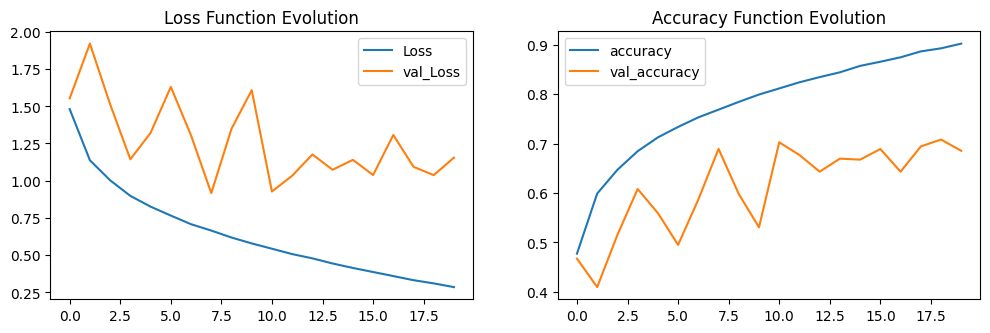

In [11]:
# Plot metrics
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [25]:
r.history['accuracy'][-1], r.history['loss'][-1]

(0.9019200205802917, 0.28395876288414)

**ResNet50**

In [12]:
# Build Model
def feature_extractor(inputs):
  feature_extractor = tf.keras.applications.resnet.ResNet50(
      input_shape=(224, 224, 3),
      include_top=False,
      weights='imagenet')(inputs)

  return feature_extractor


def classifier(inputs):
  x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(1024, activation="relu")(x)
  x = tf.keras.layers.Dense(512, activation="relu")(x)
  x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)

  return x


def final_model(inputs):
  resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)
  resnet_feature_extractor = feature_extractor(resize)
  classification_output = classifier(resnet_feature_extractor)

  return classification_output


def define_compile_model():
  inputs = tf.keras.layers.Input(shape=(32,32,3))
  classification_output = final_model(inputs)
  model = tf.keras.Model(inputs=inputs, outputs = classification_output)
  model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [13]:
model = define_compile_model()
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification (Dense)               │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,215,818 (100.01 MB)

 Trainable params: 26,162,698 (99.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [14]:
history = model.fit(
    X_train, y_train, epochs=1, validation_data=(X_test, y_test), batch_size=64)

loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)

782/782 ━━━━━━━━━━━━━━━━━━━━ 509s 599ms/step - accuracy: 0.7264 - loss: 0.8168 - val_accuracy: 0.5595 - val_loss: 1.4168
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.5613 - loss: 1.3996


In [15]:
loss, accuracy

(1.4168106317520142, 0.559499979019165)

**Using parameters from Tabel-1 in `Transfer_Learning_Based_On_ResNet50` paper**

In [16]:
his_1 = model.fit(
    X_train, y_train, epochs=1, validation_data=(X_test, y_test), batch_size=32, steps_per_epoch=550, validation_steps=1
)

loss_1, accuracy_1 = model.evaluate(X_test, y_test, batch_size=32)

550/550 ━━━━━━━━━━━━━━━━━━━━ 170s 269ms/step - accuracy: 0.9426 - loss: 0.1669 - val_accuracy: 0.8438 - val_loss: 0.4065
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.8963 - loss: 0.3030


In [17]:
loss_1, accuracy_1

(0.30333593487739563, 0.8984000086784363)